In this chapter, we go over statistics concepts in python.

The below input creates a histogram using friend counts.  The var `num_friends` has been created using random integers to dynamically create large amounts of data.

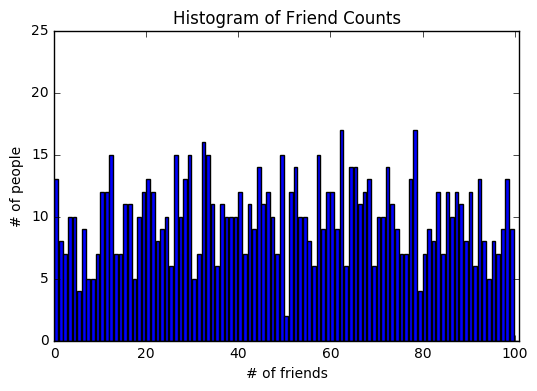

In [13]:
from collections import Counter
from matplotlib import pyplot as plt
import random

num_friends = [int(100*random.random()) for i in range(0,1000)]

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0 ,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

Below, we initialize a few vars that give us useful data points.

In [14]:
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)
sorted_values = sorted(num_friends)
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

result = [num_points, largest_value, smallest_value, second_smallest_value, second_largest_value]
result

[1000, 99, 0, 0, 99]

With these new data points, we can get the average number of friends.

In [15]:
from __future__ import division
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

49.749

And we can also get the median.

In [17]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi] /2)
    
median(num_friends)

74.0

Below we create the `quantile()` function that determines the value of the *p*th percentile.

In [20]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

result = [quantile(num_friends, 0.10),
          quantile(num_friends, 0.25),
          quantile(num_friends, 0.75),
          quantile(num_friends, 0.90)]

result

[11, 26, 73, 88]

Below, the `mode()` function determines the most common value(s) of the list.

In [23]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

mode(num_friends)

[62, 78]

Below, we calculate range as the difference between min and max in our data set.

In [26]:
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

Below, we bring back the `dot()` and `sum_of_squares()` functions from the previous chapter, and use it to read variance, which is the sum of squared deviations divided by the number of cases in the population, or `n - 1` in the sample.  It is a building block for other types of data consumption, like standard deviation.

In [29]:
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

783.4074064064065

Below, we see that standard deviation is the square root of variance.  Simple stuff.

In [30]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

27.98941597115607

But if we change the highest value in our data set from 99 to 2000, we'll begin to have problems with the standard deviation.

In [36]:
num_friends.append(2000)
max(num_friends)

standard_deviation(num_friends)

68.20060559929742

To mitigate this, we can compute the difference between the 75th percentile and the 25th percentile.

In [37]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

47

Which remains the same whether the new outlier exists or not.

The below output demonstrates covariance, which is the average of the cross products of a distribution.  In plain english, where as variance measures the deviation of one var, covariance measures the tandem deviations of two vars.

In [48]:
daily_minutes = [int(100*random.random()) for i in range(0,1005)]
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes)

69.40361638025011

Since it's difficult to understand covariance's output since -- in this case -- the value is a *friend-minute* and is almost meaningless, it's more appropriate to get a clear measure using correlation.

In [49]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

correlation(num_friends, daily_minutes)

0.03498560266561486

This value always lies between `-1` (perfect anti-correlation) and `1` (perfect correlation).  A value of `0` represents no correlation.  The above value of `0.0349` represents a very weak anti-correlation.

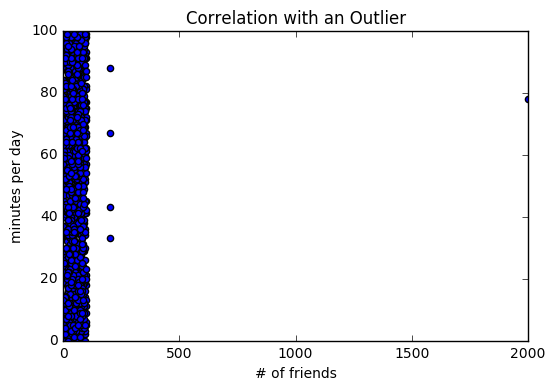

In [55]:
plt.scatter(num_friends, daily_minutes)
plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.axis([0, 2000, 0, 100])
plt.show()

Since correlation can be sensitive to outliers, we must remove any of them.  That 2000 friend outlier looks like a good start.

In [57]:
outlier = num_friends.index(2000)
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.015512733607637367

It did in fact change our correlation to a lower value, and I'm not surprised since the data's been added completely at random.

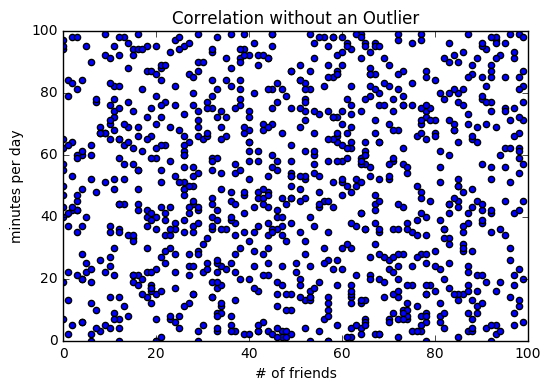

In [59]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Correlation without an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.axis([0, 100, 0, 100])
plt.show()